In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = ("data/city_data.csv")
ride_data_to_load = ("data/ride_data.csv")

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_df = pd.merge(ride_data_to_load_df, city_data_to_load_df,  
                          how='left', on=['city', 'city'])
# Display the data table for preview
city_ride_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [40]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data_df[city_ride_data_df['type']== 'urban']
suburban_cities = city_ride_data_df[city_ride_data_df['type']== 'suburban']
rural_cities = city_ride_data_df[city_ride_data_df['type'] == 'rural']

#urban fare, rides, driver
urban_fare = urban_cities.groupby(['city']).mean()['fare']
urban_rides = urban_cities.groupby(['city']).count()['ride_id']
urban_driver = urban_cities.groupby(['city']).mean()['driver_count']

#suburban fare, rides, driver

suburban_fare = suburban_cities.groupby(['city']).mean()['fare']
suburban_rides = suburban_cities.groupby(['city']).count()['ride_id']
suburban_driver = suburban_cities.groupby(['city']).mean()['driver_count']  

#rural fare, rides, driver
rural_fare = rural_cities.groupby(['city']).mean()['fare']
rural_rides = rural_cities.groupby(['city']).count()['ride_id']
rural_driver = rural_cities.groupby(['city']).mean()['driver_count']

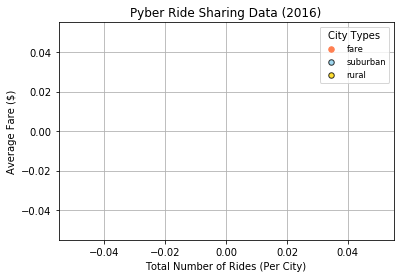

In [41]:



# Build the scatter plots for each city types


plt.scatter(urban_rides, 
            urban_fare, 
            s=10*urban_driver, c ="coral",
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8, label="urban")


plt.scatter(suburban_rides,
            suburban_fare,
            s=10*suburban_driver, c ='skyblue',
            edgecolor='black', linewidth=1, 
            marker='o', alpha=0.8, label='suburban')

plt.scatter(rural_rides,
            rural_fare,
            s=10*rural_driver, c = 'gold', 
            edgecolor='black', linewidth=1, 
            marker='o', alpha=0.8, label='rural')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size

# Save Figure


In [42]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

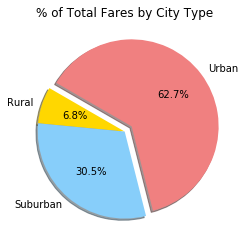

In [30]:
# Calculate Type Percents
avg_fare = (city_ride_data_df.groupby(['type']).sum()['fare']/ city_ride_data_df['fare'].sum() *100)

# Build Pie Chart
plt.pie(avg_fare, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure


In [31]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

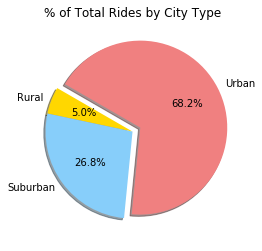

In [32]:
# Calculate Ride Percents
total_rides = (city_ride_data_df.groupby(['type']).sum()['ride_id']/ city_ride_data_df['ride_id'].sum() *100)

# Build Pie Chart
plt.pie(total_rides, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure


In [33]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

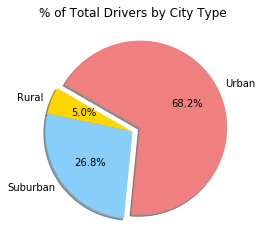

In [21]:
# Calculate Driver Percents
total_drivers = (city_data_to_load_df.groupby(['type']).sum()['driver_count'] / city_data_to_load_df['driver_count'].sum()*100) 

total_drivers
# Build Pie Charts
plt.pie(total_rides, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure


In [10]:
# Show Figure
plt.show()